# Miscellaneous features

## Timestamp

Give your file, group or dataset a timestamp by calling `.write_iso_timestamp()`

In [1]:
import h5rdmtoolbox as h5tbx

In [2]:
with h5tbx.File() as h5:
    h5.write_iso_timestamp()
    h5.dump()

## Working with time data

HDF5 cannot store `datetime` objects. The solution is to store them as string-datasets. Therefore, `datetime` is written to the HDF5 datasets in iso-format. When data is requested, it is converted back to `numpy.datetime64` format and fed into the `xarray` object. Note, that you may use the method `create_time_dataset` instead of constructing the string dataset yourself. In fact, this is recommended, because some attributes must be set in order to identify a dataset as a "time-data-dataset":

In [3]:
import datetime

In [4]:
with h5tbx.File() as h5:
    h5.create_time_dataset('time', data=[datetime.datetime.now(),
                                           datetime.datetime.now()+datetime.timedelta(hours=1),
                                           datetime.datetime.now()+datetime.timedelta(hours=3)],
                            attrs={'ISTIMEDS': True,
                                  'TIMEFORMAT': 'ISO'}, make_scale=True)
    h5.create_dataset('vel', data=[1,2,-3], attach_scale='time')
    v = h5.vel[()]
    t = h5.time[()]

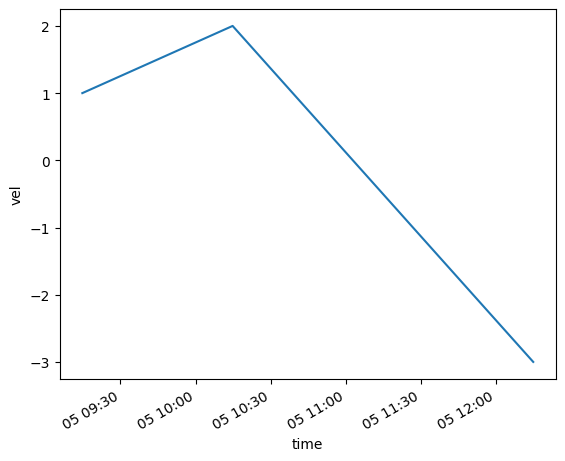

In [5]:
v.plot()